In [1]:
library(tidyverse) # metapackage with lots of helpful functions

list.files(path = "../input")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.3     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "santander-customer-transaction-prediction-dataset"

In [2]:
options(warn=-1)
library(tidyverse) 
library(ggplot2)
library(randomForest)
library(ROSE)
library(factoextra)
# library(ggsignif)
library(pROC)
# library(MLeval)
library(glmnet)
library(caret)
library(e1071)
library(DMwR)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Loaded ROSE 0.0-3


Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 3.0-1


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


Loading required package: grid

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registere

In [3]:
df_santander<-read.csv('../input/santander-customer-transaction-prediction-dataset/train.csv')

In [4]:
set.seed(689)
train.index<-sample(1:nrow(df_santander),0.7*nrow(df_santander))

#train data
X<-df_santander[train.index,]

#validation data
y<-df_santander[-train.index,]
X<-X[,-c(1)]
y<-y[,-c(1)]

In [5]:
X$target<-as.factor(X$target)
y$target <- as.factor(y$target)

### NAIVE BAYES

In [ ]:
library(caret)

In [7]:
head(X,10)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,⋯,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
80659,0,15.4454,-2.1342,12.1856,6.6749,12.1245,-10.2972,6.2426,15.6102,-0.4873,⋯,3.6178,9.3440,1.9769,2.5434,20.9084,-1.1858,5.8884,10.5752,15.5159,-14.5356
110785,0,12.2212,-2.5003,12.8968,8.8620,10.9703,-10.7331,5.9983,21.6626,-2.5280,⋯,1.3204,4.9753,4.2038,6.6867,20.0412,0.7316,8.0177,9.9985,13.5385,5.9680
47133,0,11.4328,-5.9172,13.6477,8.2814,11.2588,-11.4848,6.1190,17.5951,-1.8159,⋯,-4.2916,12.2174,3.6276,3.9027,17.6763,-0.3088,0.1684,10.5046,17.4824,-10.3483
119960,1,14.5871,6.8814,12.2160,6.9613,10.5241,-6.5588,5.8625,19.4279,0.8720,⋯,4.2000,13.5637,-0.7121,3.1547,11.0201,1.0084,2.2338,8.8691,13.2250,0.6828
55089,1,8.0119,-7.9034,9.8523,8.4371,11.4787,-11.6741,6.9317,13.6076,2.8089,⋯,11.1607,6.2845,3.0618,8.3749,15.4829,0.1360,4.6315,9.1644,19.7805,-0.2950
156273,0,8.5795,-4.9593,14.3864,8.2635,10.7799,-2.8019,4.7163,22.3022,3.6832,⋯,5.7697,11.3875,3.7143,6.9455,19.5369,-1.3494,8.4225,9.5963,16.6768,6.5575
184536,0,12.3288,-1.4259,8.9310,5.7891,8.9333,-3.6543,5.3661,12.9355,-0.4660,⋯,2.7402,7.0169,3.6991,9.2600,20.9966,-3.4228,13.9718,9.0543,15.9945,1.0825
174256,0,8.1805,-4.7532,10.3207,8.7659,12.6191,-11.8200,3.6441,15.5889,-2.0183,⋯,7.5965,10.6673,1.3607,-0.3220,17.6542,-1.2798,-5.6377,9.7417,21.9403,10.9247
14419,0,8.2717,-2.1131,13.4293,9.1517,9.2454,-6.7407,7.1857,13.3136,-0.9246,⋯,7.1209,14.8937,3.7680,-3.9716,20.8339,2.5454,-5.0800,7.7362,10.4340,-8.8387


In [16]:
model_fit <- train(X[,2:201],X$target,'nb',trControl=trainControl(method='cv',number=10))

In [17]:
pred = predict(model_fit, newdata=y,type='raw')
y_pred_num <- ifelse(pred > 0.5, 1, 0)

In [19]:
library(pROC)
library(DMwR)

In [40]:
y_pred_num <- as.factor(y_pred_num)
confusionMatrix(data=pred, as.factor(y[,'target']))

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 53321  3873
         1   717  2089
                                          
               Accuracy : 0.9235          
                 95% CI : (0.9213, 0.9256)
    No Information Rate : 0.9006          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4409          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9867          
            Specificity : 0.3504          
         Pos Pred Value : 0.9323          
         Neg Pred Value : 0.7445          
             Prevalence : 0.9006          
         Detection Rate : 0.8887          
   Detection Prevalence : 0.9532          
      Balanced Accuracy : 0.6686          
                                          
       'Positive' Class : 0               
                  

In [23]:
library(PRROC)


Attaching package: ‘PRROC’


The following object is masked from ‘package:ROSE’:

    roc.curve




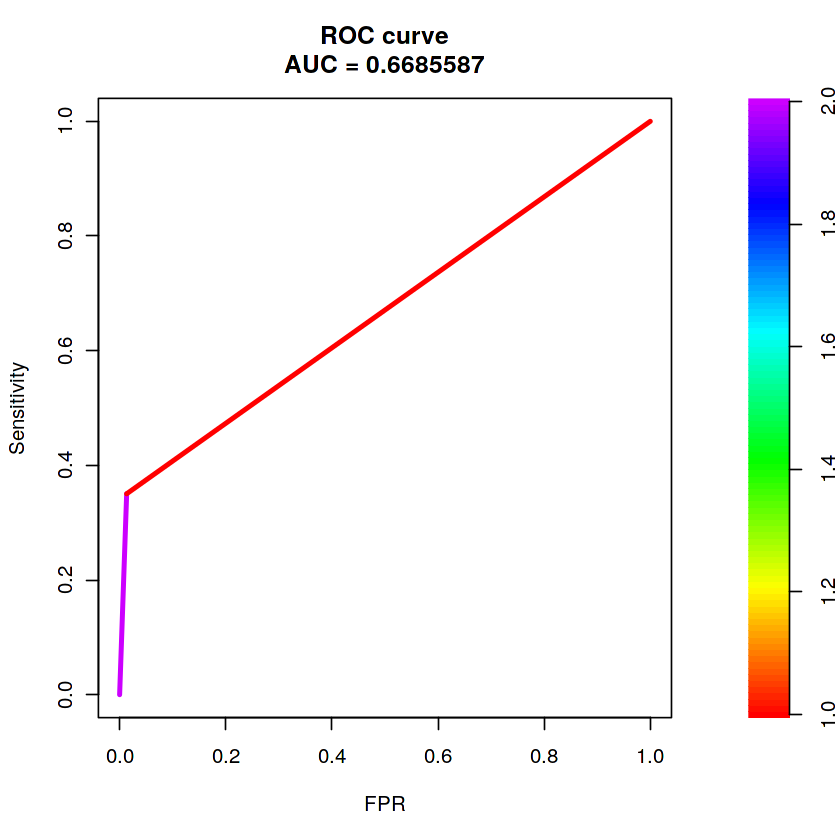

In [24]:
fg <- pred[y$target == 1]
bg <- pred[y$target == 0]

# ROC Curve    
roc <- roc.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
plot(roc)

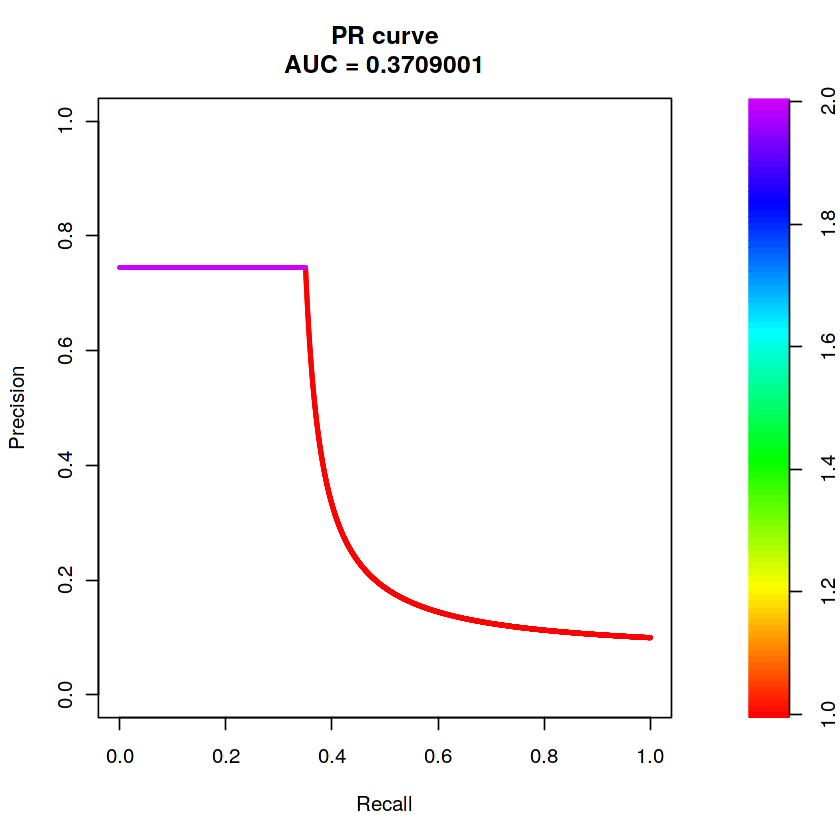

In [29]:
# PR Curve
pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
plot(pr)

### NB on Oversampled DT

In [32]:
set.seed(699)
library('ROSE')

X_rose <- ROSE(target~., data =X[,],seed=32)$data
table(X_rose$target)

y_rose <- ROSE(target~., data =y[,],seed=42)$data

X_rose$target<-as.factor(X_rose$target)
y_rose$target <- as.factor(y_rose$target)


    0     1 
70036 69964 

In [33]:
rm("df_santander","X_train")
rm("y_train","X_test","y_test","X_train_rs","y_train_rs","X_test_rs","y_test_rs","x_pc","y_pc")
rm("train.index")
rm("X_index")

In [35]:
model_fit2 <- train(X_rose[,2:201],X_rose$target,'nb',trControl=trainControl(method='cv',number=10))

In [36]:
pred2 = predict(model_fit2, newdata=y_rose,type='raw')
y_pred_num2 <- ifelse(pred2 > 0.5, 1, 0)

In [41]:
y_pred_num2 <- as.factor(y_pred_num2)
confusionMatrix(data=pred2, as.factor(y_rose[,'target']))

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 23022  7387
         1  6901 22690
                                          
               Accuracy : 0.7619          
                 95% CI : (0.7584, 0.7653)
    No Information Rate : 0.5013          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5237          
                                          
 Mcnemar's Test P-Value : 4.961e-05       
                                          
            Sensitivity : 0.7694          
            Specificity : 0.7544          
         Pos Pred Value : 0.7571          
         Neg Pred Value : 0.7668          
             Prevalence : 0.4987          
         Detection Rate : 0.3837          
   Detection Prevalence : 0.5068          
      Balanced Accuracy : 0.7619          
                                          
       'Positive' Class : 0               
                  

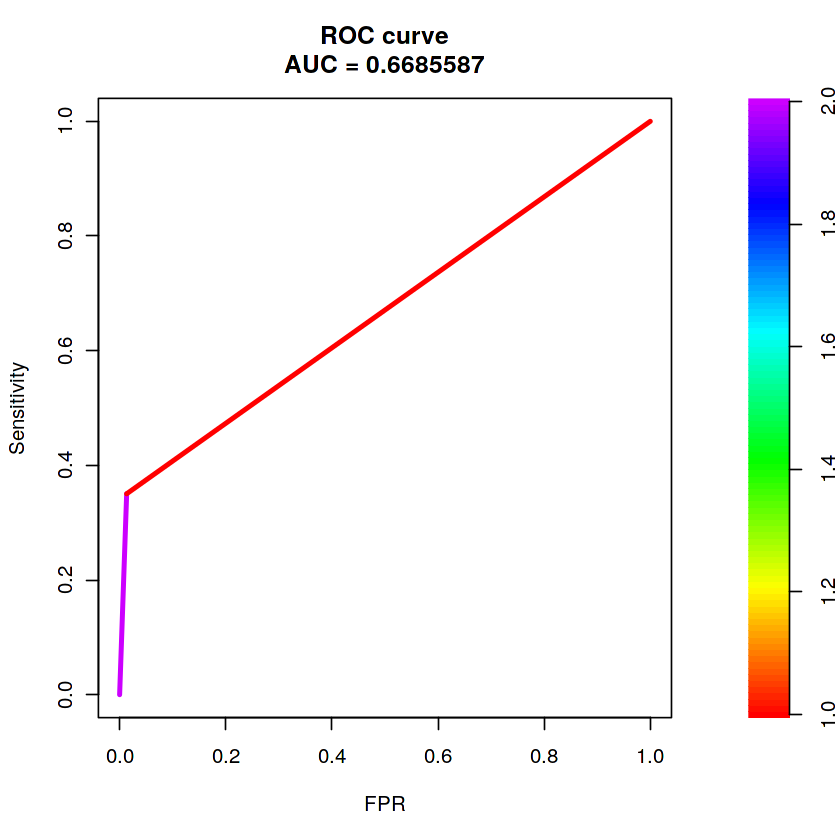

In [38]:
fg1 <- pred2[y_rose$target == 1]
bg1 <- pred2[y_rose$target == 0]

# ROC Curve    
roc1 <- roc.curve(scores.class0 = fg1, scores.class1 = bg1, curve = T)
plot(roc)

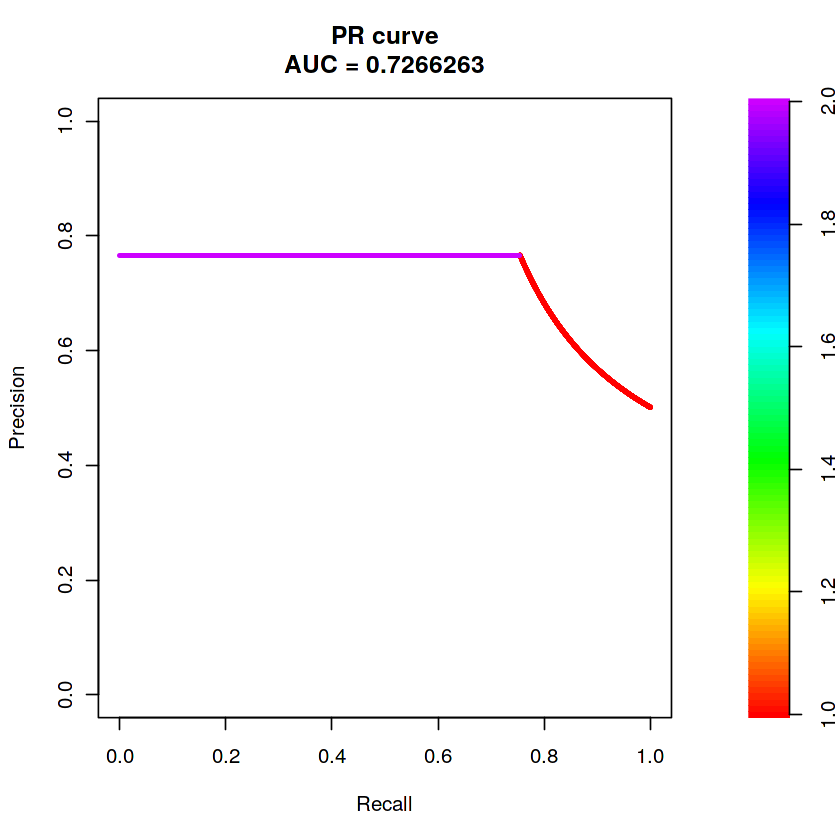

In [39]:
# PR Curve
pr2 <- pr.curve(scores.class0 = fg1, scores.class1 = bg1, curve = T)
plot(pr2)